<h1>DSCI100-004 Group 38 Final Report</h1>

In [16]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)
source("cleanup.R")

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


<h2>Introduction</h2>

A research group in the department of Computer Science at UBC is collecting data about how people engage in playing video games. The project examines data collected from a dedicated Minecraft server used to study player behaviour. As players explore the world, their actions and demographic information are recorded, which produces a dataset that summarizes their gameplay patterns. The researchers can use this data to draw insights relevant to advancing research into artificial intelligence. The central question guiding this report is: Can a player’s age and gaming experience predict the total number of gameplay hours they contribute to the Minecraft research server? To address this question, we analyzed the <code>players.csv</code> dataset which contains player-specific information and cumulative play data, with 196 rows and 7 columns. 

<h3>players.csv</h3>

| Variable | Type   | Description    |
|:----------|:--------:|----------------:|
|<code>experience</code>| Character | A categorical variable used to report the player's experience level ("Beginner", "Amateur", "Regular", "Veteran", "Pro") |
|<code>subscribe </code>| Logical | A boolean categorical variable used to represent whether the players are subscribed or not subscribed. |
|<code>hashedEmail</code>| Character | A categorical variable used to recognize each player. Each player has a unique code to identify them by. |
|<code>played_hours</code> | Double |  A numerical variable used to report the player's total hours played. |
|<code>name</code>| Character | A categorical variable used to identify the player's name. |
|<code>gender</code> | Character |  A categorical variable used to identify the player's gender.|
|<code>Age</code>| Double | A numerical variable used to report the player's age.|


For the purposes of our data analysis, we are only concerned with the <code>age</code>, <code>experience</code> and <code>played_hours</code> of each participant. 
Potential issues identified within this dataset includes:
<li>
    <ol>Two missing values in the <code>Age</code> variable.</ol>
    <ol>Disproportionate number of players across each <code>experience</code> category.</ol>
    <ol>A right skewed distribution in <code>played_hours</code>, with many users logging very little playtime.</ol>
</li>

<h2>Methods & Results</h2>

The analysis began with loading the dataset from a URL using <code>read_csv()</code>, and a random seed was set (<code>set.seed(38)</code>) before any data splitting to ensure that the results would be consistent and reproducible each time the notebook is run. After loading the data, the full table was printed to confirm that all seven columns were present and to check for missing values, since some rows in the original dataset contained empty or incomplete entries. This initial step ensured that the dataset was properly formatted before any processing or modelling took place.    

Next, data wrangling was performed to prepare the dataset for analysis. Since the predictive question focuses on age, experience level and total gameplay hours, only the variables: <code>experience</code>, <code>Age</code>, and <code>played_hours</code> were selected from the original dataset. The <code>drop_na()</code> function was then used to remove rows containing missing values in any of these three variables, resulting in a tidy dataset of 194 complete observations, which serves as the foundation for all modelling steps. 

After tidying the data, summary statistics were generated to understand the characteristics of the dataset. Using <code>summarize()</code>, the mean and standard deviation of <code>Age</code> and <code>played_hours</code> were calculated, along with the correlation between these two variables. Additional grouped summaries were created using <code>group_by(experience)</code>  to examine how <code>Age</code> and <code>played_hours</code> varied across different experience levels, including the mean, minimum, maximum, standard deviation, and number of players in each category. These summaries provided a clear overview of how the variables were distributed across the dataset.

Several visualizations of the data were then created to better understand how the main variables were distributed and how they related to one another. Histograms were then used to provide a clear view of how each variable is spread across the dataset and help reveal any clustering. One showed the distribution of the total gameplay hours, and another showcased <code>Age</code>, filled by <code>experience levels</code> that were then colored to show how different groups appeared within these distributions. Next, a scatterplot of <code>Age</code> versus <code>played_hours</code> was also produced, with points colored by <code>experience level</code>, which allowed us to observe the overall relationship between the two variables and how the groups were positioned relative to each other. These plots helped identify general patterns and prepared the dataset for modelling.

The next stage involved preparing and fitting a predictive model using the <code>tidymodels</code> framework. The tidy dataset was split into a training set (75%) and a testing set (25%) using the <code>initial_split()</code> function, ordered by <code>played_hours</code> to maintain a similar distribution in both subsets. A linear regression model was specified with <code>linear_reg()</code>, since it is suited for predicting continuous outcomes, and a recipe was created and used to define the variables and the structure of the model. Afterwards, these two models were combined into a workflow, which was then fitted to the training data.

Model performance was evaluated by having the fitted model predict gameplay for both the training and testing sets, and then comparing those predictions to the actual values to measure how accurately the model performed. Using metrics(), the RMSE (Root Mean Square Error) and RMSPE (Root Mean Squared Prediction Error) were calculated to measure prediction accuracy.

Finally, a plot was created showing the scatterplot of <code>Age versus played_hours</code> with regression lines laid for each experience level, providing a visual summary of the models' estimated trends.

In [17]:
# Loading data set & seed
set.seed(38)
url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vSSCemak0WawdLW14cASkemh8MmSgoFKf2FOZy-ypDcxcbvtyqG8vZih_rWViQnfkGN8Fuh4iqj4ag8/pub?gid=988986282&single=true&output=csv"
players <- read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [18]:
# Wrangling and cleaning of data
players_clean <- players |>
    select(experience, Age, played_hours) |>
    drop_na()
players_clean

experience,Age,played_hours
<chr>,<dbl>,<dbl>
Pro,9,30.3
Veteran,17,3.8
Veteran,17,0.0
⋮,⋮,⋮
Veteran,22,0.3
Amateur,57,0.0
Amateur,17,2.3


In [19]:
# Summary of data set

# Summary table of quantitative variables
summary_table <- players_clean |>
  summarise(
      mean_Age = mean(Age),
      sd_Age = sd(Age),
      mean_hours = mean(played_hours),
      sd_hours = sd(played_hours),
      correlation_age_hours = cor(Age, played_hours))
summary_table

# Summary statistics grouped by experience level
summary_stats <- players_clean |>
    group_by(experience) |>
    summarise(
        amount_of_players = n(),
        mean_Age = mean(Age, na.rm = TRUE),
        sd_Age = sd(Age, na.rm = TRUE),
        min_Age = min(Age, na.rm = TRUE),
        max_Age = max(Age, na.rm = TRUE),
        
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        sd_played_hours = sd(played_hours, na.rm = TRUE),
        min_played_hours = min(played_hours, na.rm = TRUE),
        max_played_hours = max(played_hours, na.rm = TRUE))
summary_stats

mean_Age,sd_Age,mean_hours,sd_hours,correlation_age_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.13918,7.389687,5.904639,28.49793,-0.06302587


experience,amount_of_players,mean_Age,sd_Age,min_Age,max_Age,mean_played_hours,sd_played_hours,min_played_hours,max_played_hours
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Amateur,63,21.36508,7.586707,11,57,6.0174603,21.987214,0,150.0
Beginner,35,21.65714,6.082486,17,42,1.2485714,4.105547,0,23.7
Pro,13,16.92308,3.839738,9,25,2.7846154,8.283905,0,30.3
Regular,35,22.02857,9.992602,10,58,18.7257143,58.719074,0,223.1
Veteran,48,20.95833,6.304198,16,46,0.6479167,1.937424,0,12.5


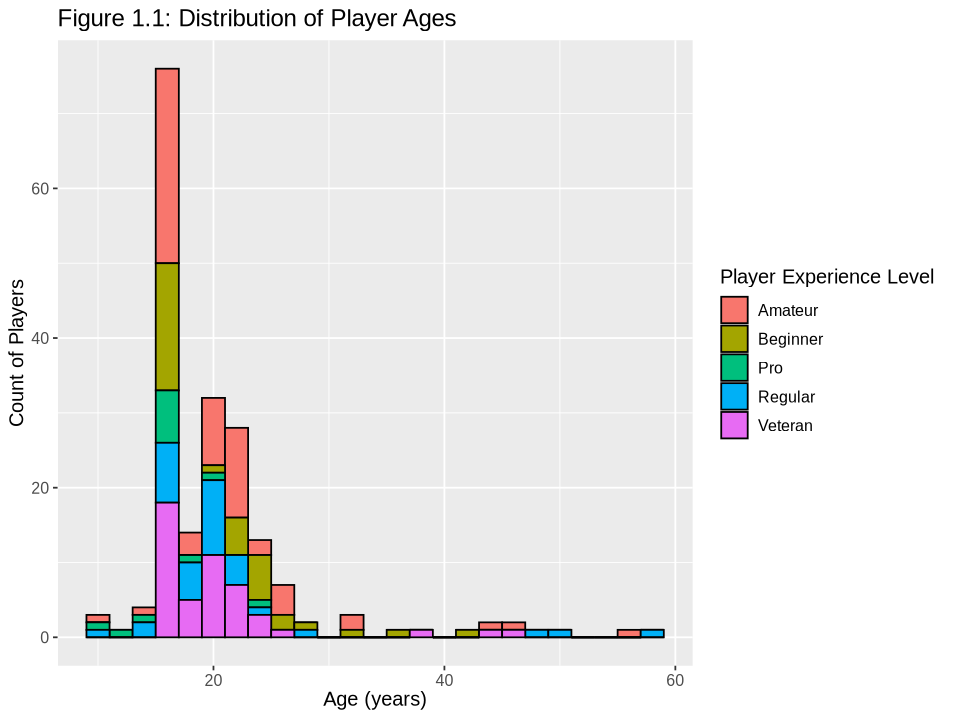

In [20]:
# Distribution of player's ages 
options(repr.plot.width = 8, repr.plot.height = 6)
age_distribution <- players_clean |>
  ggplot(aes(x = Age, fill = experience)) +
  geom_histogram(binwidth = 2, color = "black") +
  labs(
      title = "Figure 1.1: Distribution of Player Ages", 
      x = "Age (years)", 
      y = "Count of Players", 
      fill = "Player Experience Level") +
  theme(text = element_text(size = 12))
age_distribution

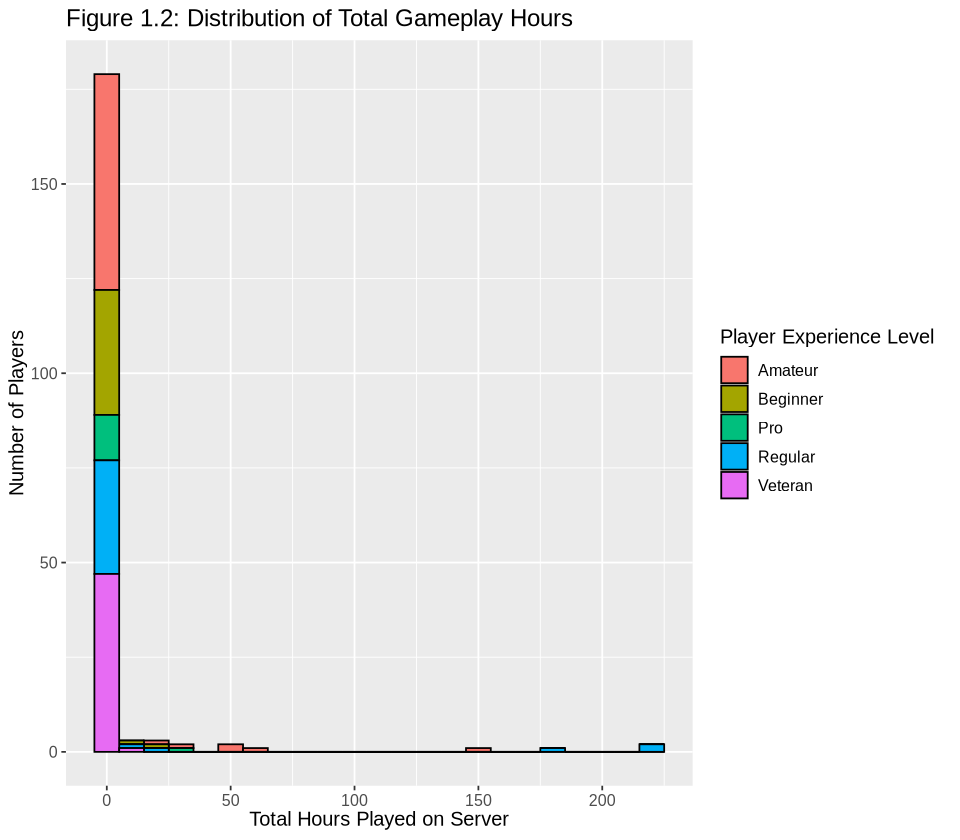

In [21]:
# Distribution of played hours per each player
options(repr.plot.width = 8, repr.plot.height = 7)
hours_distribution <- players_clean |>
  ggplot(aes(x = played_hours, fill = experience)) +
  geom_histogram(binwidth = 10, color = "black") +
  labs(
      title = "Figure 1.2: Distribution of Total Gameplay Hours", 
      x = "Total Hours Played on Server", 
      y = "Number of Players", 
      fill = "Player Experience Level") +
  theme(text = element_text(size = 12))
hours_distribution

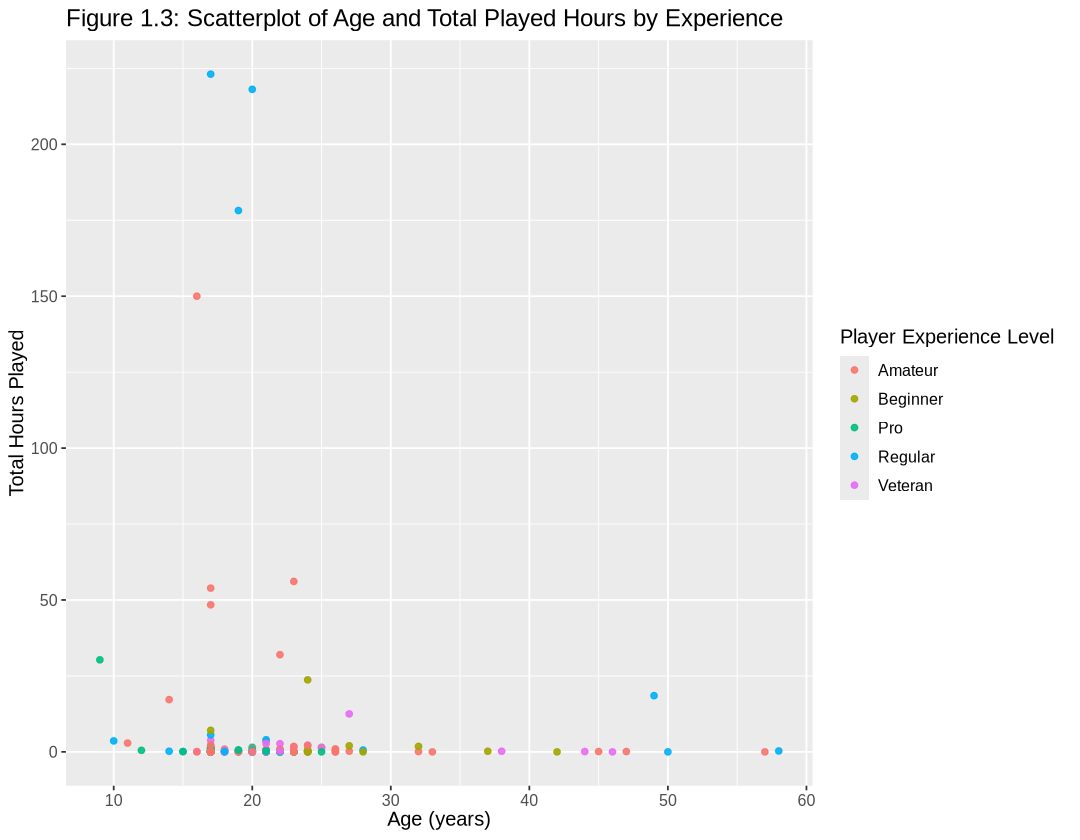

In [22]:
# Relationship between played hours and age
options(repr.plot.width = 9, repr.plot.height = 7)
players_plot <- players_clean |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point(alpha = 0.9) +
    labs(title = "Figure 1.3: Scatterplot of Age and Total Played Hours by Experience", 
         x = "Age (years)", 
         y = "Total Hours Played", 
         color = "Player Experience Level") +
    theme(text = element_text(size = 12))
players_plot

In [23]:
# Splitting the model for linear regression
set.seed(38)
players_split <- initial_split(players_clean, prop = 0.75, strata = played_hours)
players_training <- training(players_split)
players_testing <- testing(players_split)

In [24]:
# Linear Regression Model Specification, Recipe, & Workflow
set.seed(38)
lm_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

players_recipe <- recipe(played_hours ~ Age + experience, data = players_training)

players_fit <- workflow() |>
       add_recipe(players_recipe) |>
       add_model(lm_spec) |>
       fit(data = players_training)

In [25]:
# RMSE & RMSPE Values
set.seed(38)
lm_rmse <- players_fit |>
         predict(players_training) |>
         bind_cols(players_training) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmse

lm_rmspe <- players_fit |>
         predict(players_testing) |>
         bind_cols(players_testing) |>
         metrics(truth = played_hours, estimate = .pred) |>
         filter(.metric == "rmse") |>
         select(.estimate) |>
         pull()
lm_rmspe

[1] 30.86097

[1] 16.26574

`geom_smooth()` using formula = 'y ~ x'


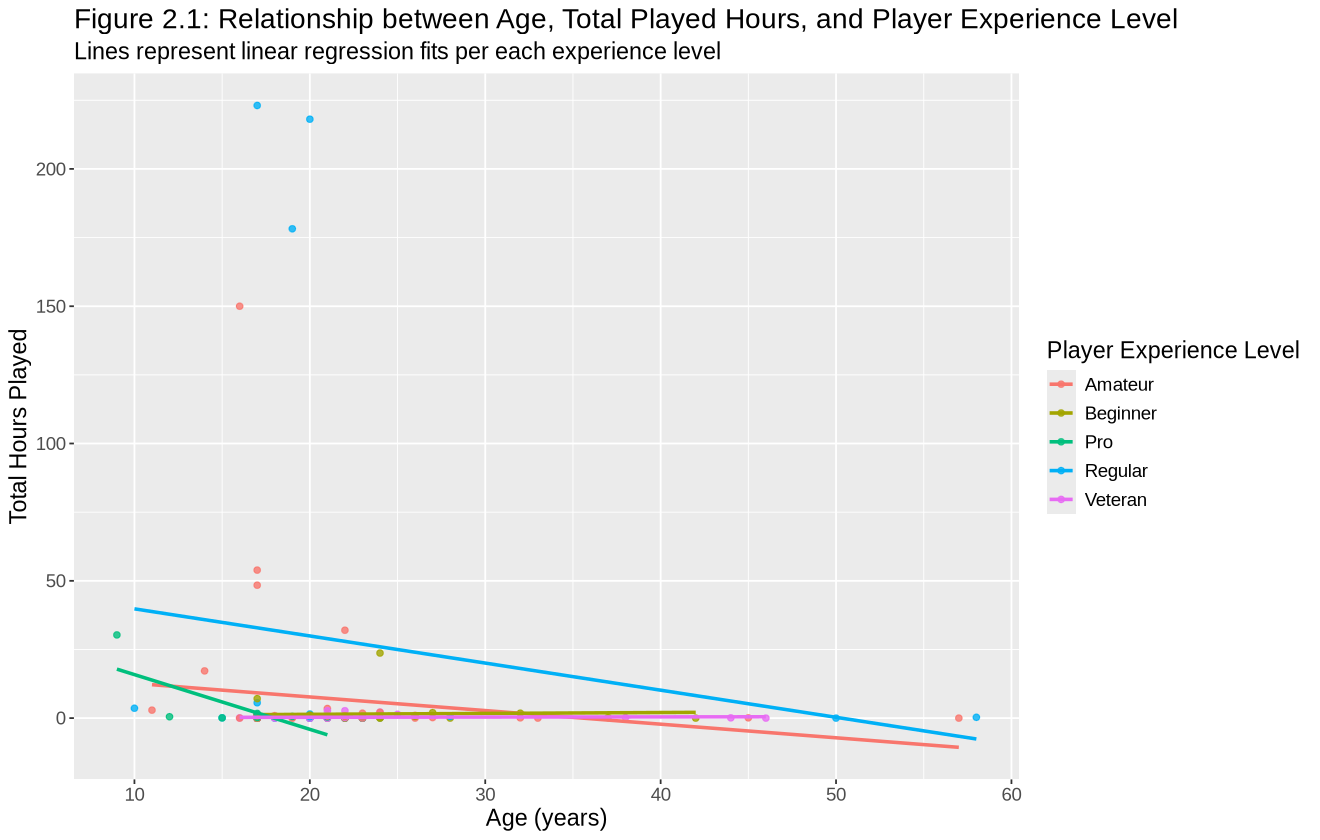

In [26]:
# Model Predictions & Plot
set.seed(38)
players_preds <- players_fit |>
   predict(players_training) |>
   bind_cols(players_training)

options(repr.plot.width = 11, repr.plot.height = 7)
lm_predictions <- players_preds |>
     ggplot(aes(x = Age, y = played_hours, color = experience)) +
            geom_point(alpha = 0.8) +
            geom_smooth(method = "lm", se = FALSE) +
            labs(
                title = "Figure 2.1: Relationship between Age, Total Played Hours, and Player Experience Level",
                subtitle = "Lines represent linear regression fits per each experience level",
                x = "Age (years)", 
                y = "Total Hours Played", 
                color = "Player Experience Level") +
            theme(text = element_text(size = 14))
lm_predictions

<h2>Discussion</h2>

From the limited data we have, we found that the majority of active players are Amateurs and Regulars, while Beginners and Pros are closely tied. Veteran players contributed the fewest hours (figure 1.2). The majority of players were between the ages of 15 and 25 (figure 1.1). These initial findings are to be expected, as Amateurs made up the majority of players at 63, while Veterans were second with 48, and Beginners and Regulars both had 35. More experience and/or familiarity with the game correlates with increased playtime; thus, Regulars being the largest contributing group for playtime was expected. Younger players made up the majority of active users (figure 1.1); however, this was due to a handful of outliers contributing significant hours of playtime. Trends in age were not significant compared to experience levels. This could be explained by the dataset’s limited size, so the expectation that younger players would contribute more remains. 

Despite the more noticeable relationship between <code>experience</code> and played_hours, the predictive ability of the model using <code>Age</code> and <code>experience</code> was limited (figure 2.1), which may be due to the small size of the dataset. It could also suggest that external factors are more powerful predictors, or that more complex mechanisms may be at play. These factors include player motivation, such as creativity, competition, or social interaction. Other behaviours and external factors, such as the presence of friends, personal availability, the presence of more appealing alternatives, or competitiveness, can also contribute. Another major factor that influenced our data was the large number of inactive players who left early with less than an hour of playtime, which could explain the lack of a strong relationship. Non-linear relationships could be examined, as increases in <code>played_hours</code> may have diminishing or increasing returns that are not easily indicated by a linear model.

Although the database we had access to was relatively small, and most players were inactive, we could use the trends seen here to examine games with larger player bases and use the data for marketing purposes. Playtime is indicative of engagement, so by identifying the demographics that are most engaged with a game, targeted advertising can be used to increase the effectiveness of game advertising and increase the number of users for a game. Non-gaming applications may not be as effective, but interpolation of results to other programs, such as social media, may be possible for predicting levels of engagement. Other applications could include encouraging community development efforts focused on Amateurs to boost engagement for newer players, or general server events also focused towards newer players for the same purpose.

Future research can focus on specific age groups, as the primary demographic here skews younger, and further investigate the relationship between <code>Age</code> and engagement. It could also investigate other factors listed previously that were not included in the initial question or dataset, which may be more powerful predictors. Time may also be investigated, as the amount of time one has to play is directly correlated to the time of year. Studying the factors behind player retention and the reasons why players disengage early could also help determine whether a player becomes more consistently active or disengages early. 

Future questions we have would include:
- How important are social dynamics and connections for player engagement and activity?
- How does time (eg, school vs breaks, weekends vs weekdays) affect player activity? 
- Does motivation have a significant effect on player engagement? 
- How do server events, features, and updates influence engagement across experience levels?
- Does playtime increase depending on the gamemode (eg, creative, survival, adventure) employed? 
- How accurately can playtime be predicted when multiple variables are included in a more complex model?
- What are the differences between players who consistently play and players whose playtime fluctuates?


Link to GitHub repository: https://github.com/gnouvles/dsci100-004_group38